In [ ]:
!pip install numpy==1.23.1
!pip install pandas==1.4.3
!pip install matplotlib==3.3.2
!pip install seaborn==0.11.0

## Loading the Data:

([Contents:](#Contents:))

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
import seaborn as sns

import os
import time
import re

import warnings
warnings.filterwarnings('ignore')

In [ ]:

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data = pd.read_excel('/content/gdrive/MyDrive/News-Articles-Share-Prediction-project-main/Data/news_share_data.xlsx')

data.head(10)
data.shape
data.head(10)

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,2014-03-31,0.640816,5,3,1,4.579592,5,Business,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.250000,0.250000,1600
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,2014-04-01,0.549618,4,1,0,4.636704,7,Tech,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.000000,0.000000,1500
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,2014-04-01,0.577236,8,1,0,4.627451,7,Tech,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.000000,0.000000,1400
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,2014-04-01,0.525896,4,1,0,5.083665,9,Tech,0.000,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.000000,0.000000,1300
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,2014-04-01,0.588889,6,9,0,4.336022,7,00000,3581.094,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.000000,0.000000,3000
5,7033985,Apple to Begin iPhone 6 Screen Production in M...,Whispers surrounding a possible iPhone 6 relea...,2014-04-01,0.494269,8,1,0,4.360679,4,Business,3343.790,4817.692,3974.216,31625.000,0.567866,0.098980,0.038190,0.024045,0.666667,-0.333330,1600
6,7014312,"Apple Updates iWork for OS X, iOS and iCloud","Apple updated its iWork suite Tuesday, adding ...",2014-04-01,0.639706,4,1,0,4.594444,7,Lifestyle,2499.333,5549.418,3667.217,4800.000,0.347222,0.186111,0.033333,0.005556,0.000000,0.000000,1300
7,3299703,Spare Your Facebook Friends From These 9 April...,Everybody's a comedian -- at least they think ...,2014-04-01,0.508511,26,8,0,4.713427,7,Tech,3030.861,4622.544,3761.262,3700.000,0.484539,0.134520,0.050100,0.026052,0.400000,-0.150000,2000
8,7014271,Why Tech Takes April Fools' Day So Seriously,Tech journalists hate April Fools' Day. Not be...,2014-04-01,0.481013,9,3,1,4.374613,8,Lifestyle,0.000,6813.466,3745.055,11800.000,0.533060,0.186324,0.046440,0.021672,0.066667,0.033333,2100
9,7008095,Atlanta Is World's Busiest Airport With 94 Mil...,Atlanta's Hartsfield-Jackson airport remained ...,2014-04-01,0.422028,11,1,0,4.272043,5,Business,3343.790,5585.617,4111.006,2600.000,0.502861,0.121931,0.043011,0.018280,0.357143,0.000000,1100


In [ ]:
df = data.copy()

## Data Preprocessing:

In [ ]:
summary_statistics = df.describe()

summary_statistics

,article_id,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
count,1.003000e+03,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,6.915159e+06,0.526890,11.720837,5.188435,1.215354,4.603757,7.206381,1131.437972,6463.258234,3359.478830,13518.302031,0.446724,0.106187,0.038169,0.017772,0.292537,0.057536,4247.304088
std,4.823885e+05,0.118793,15.181597,8.495002,4.079730,0.701756,1.856713,1181.134621,7455.421154,1467.674637,51499.106509,0.109167,0.092496,0.015673,0.010557,0.325227,0.266609,22609.634435
min,2.195051e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3568.870000,1360.101000,0.000000,0.000000,-0.300000,0.000000,0.000000,0.000000,-1.000000,58.000000
25%,7.006102e+06,0.466751,4.000000,1.000000,0.000000,4.490363,6.000000,0.000000,3613.040000,2533.297000,1300.000000,0.395575,0.051911,0.028655,0.011224,0.000000,0.000000,1000.000000
50%,7.013065e+06,0.533118,8.000000,2.000000,0.000000,4.685484,7.000000,984.066700,4635.807000,3004.755000,2766.667000,0.455990,0.102579,0.037325,0.016266,0.200000,0.000000,1600.000000
75%,7.027570e+06,0.596615,14.000000,7.000000,1.000000,4.855388,9.000000,2116.714500,6561.910000,3809.005000,7341.000000,0.509508,0.163183,0.046922,0.022597,0.500000,0.150000,3100.000000
max,7.041291e+06,0.867925,162.000000,84.000000,51.000000,7.218430,10.000000,3613.040000,102200.000000,17604.270000,663600.000000,0.875000,0.489623,0.120805,0.103030,1.000000,1.000000,663600.000000


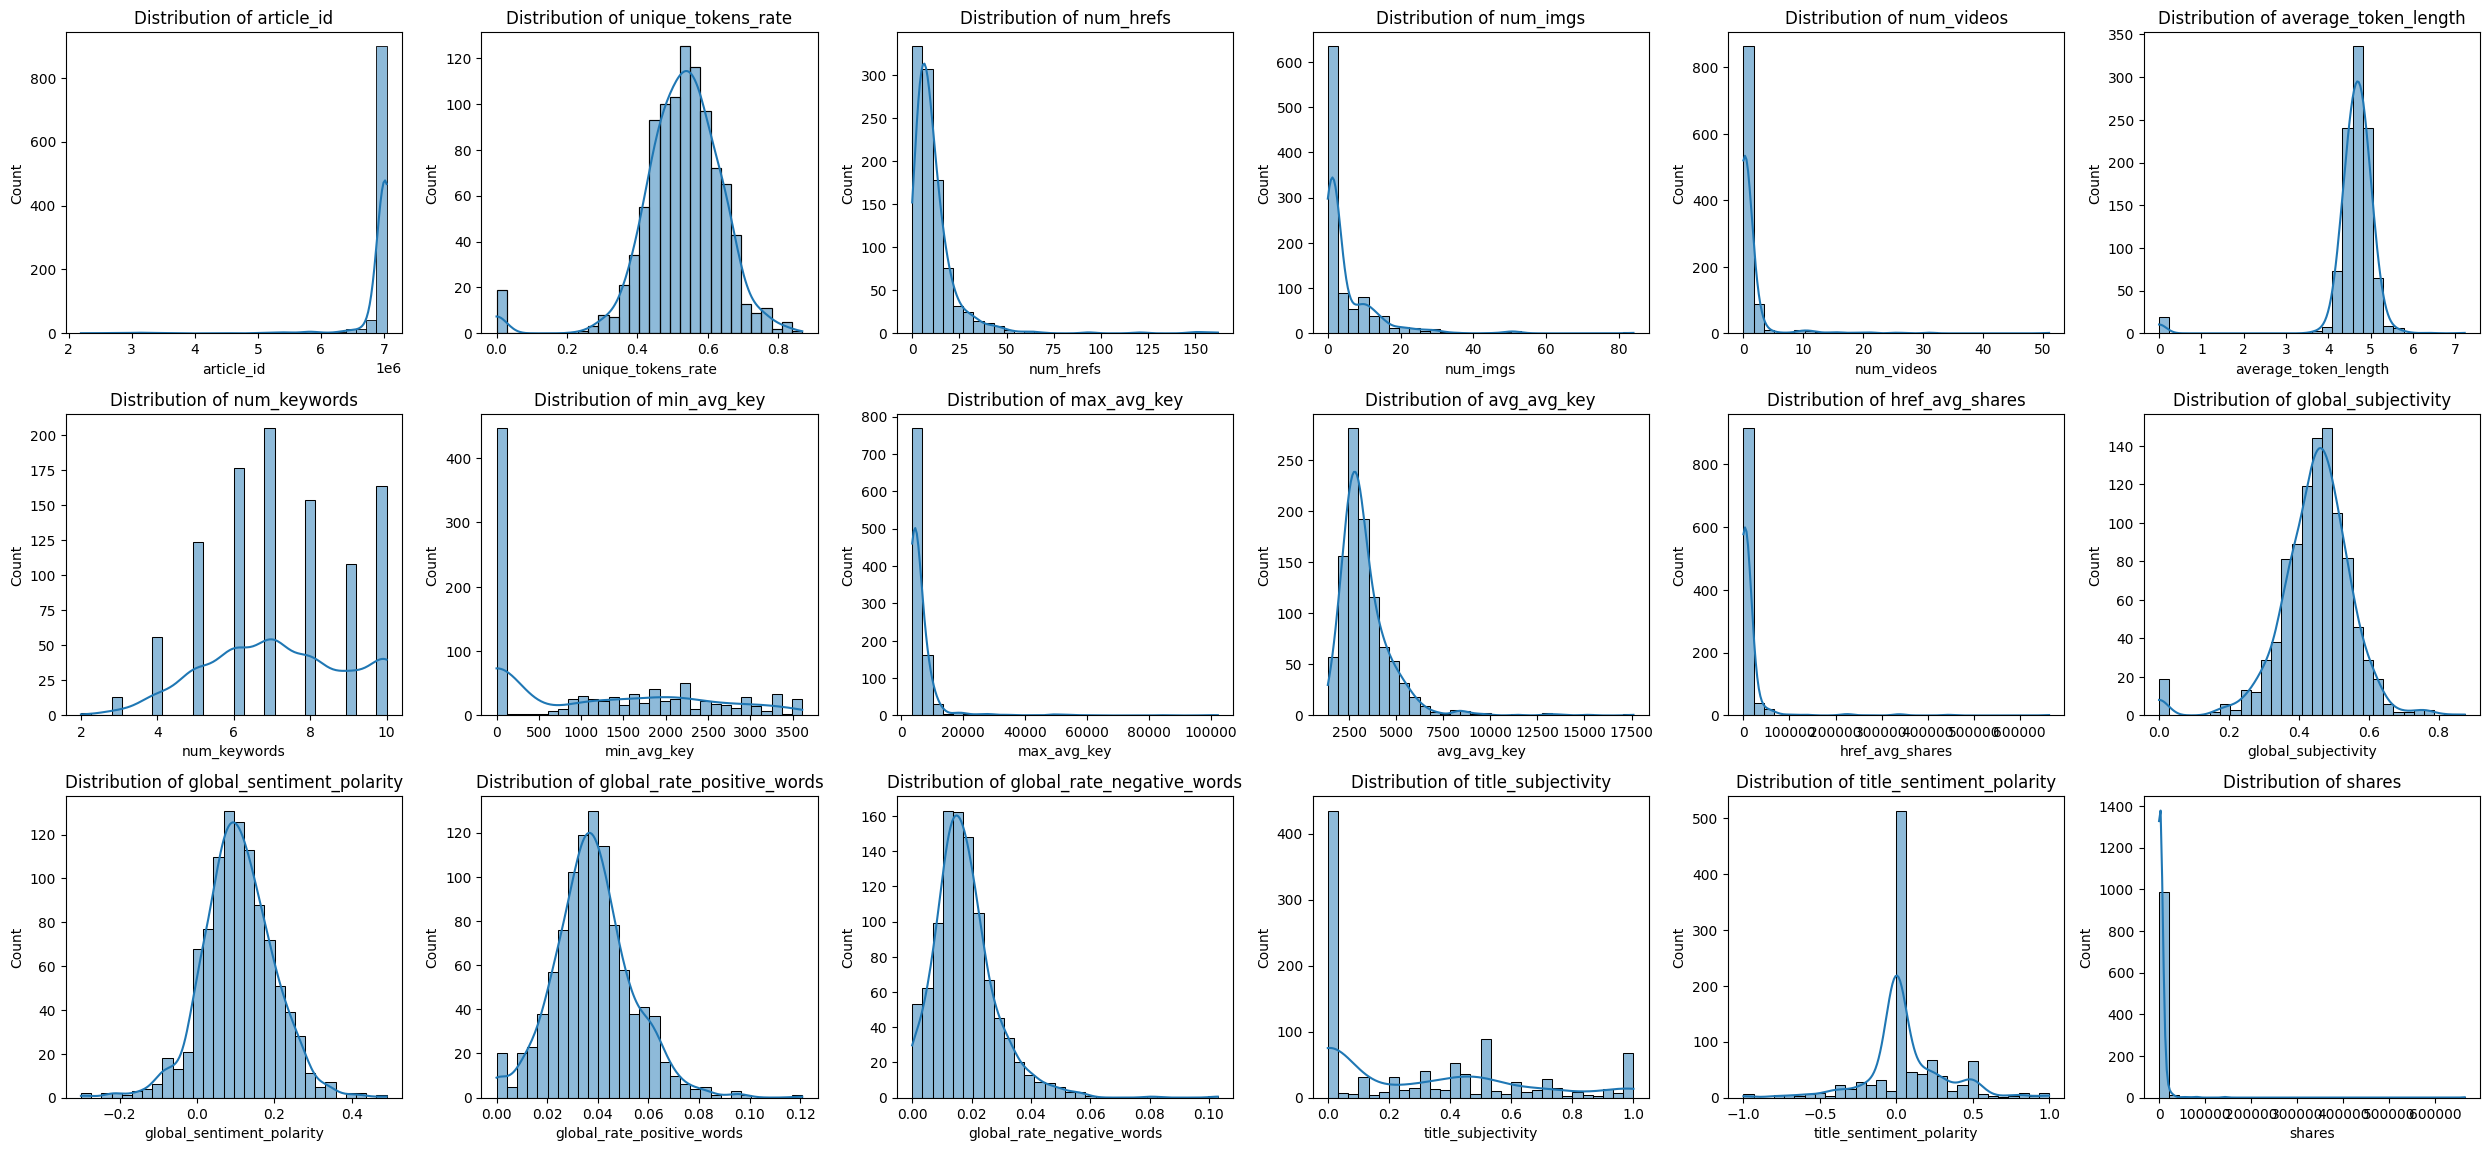

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(25, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 6, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

plt.show()


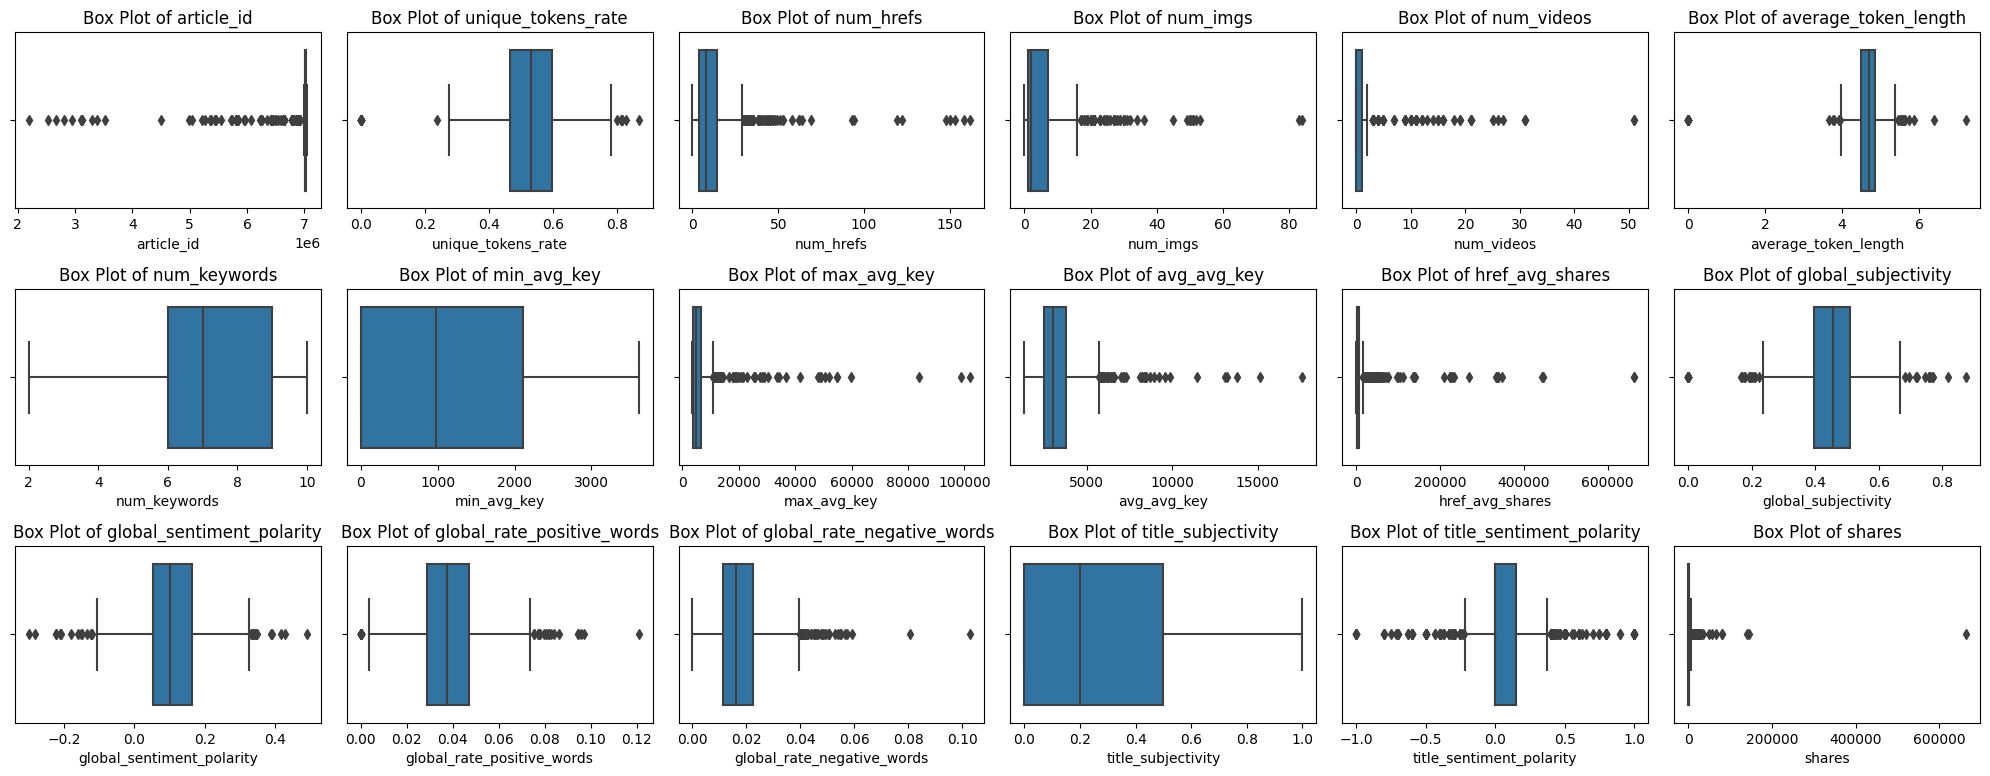

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
# box plot to see outlayer
plt.figure(figsize=(20, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 6, i)
    sns.boxplot(df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.tight_layout()

plt.show()

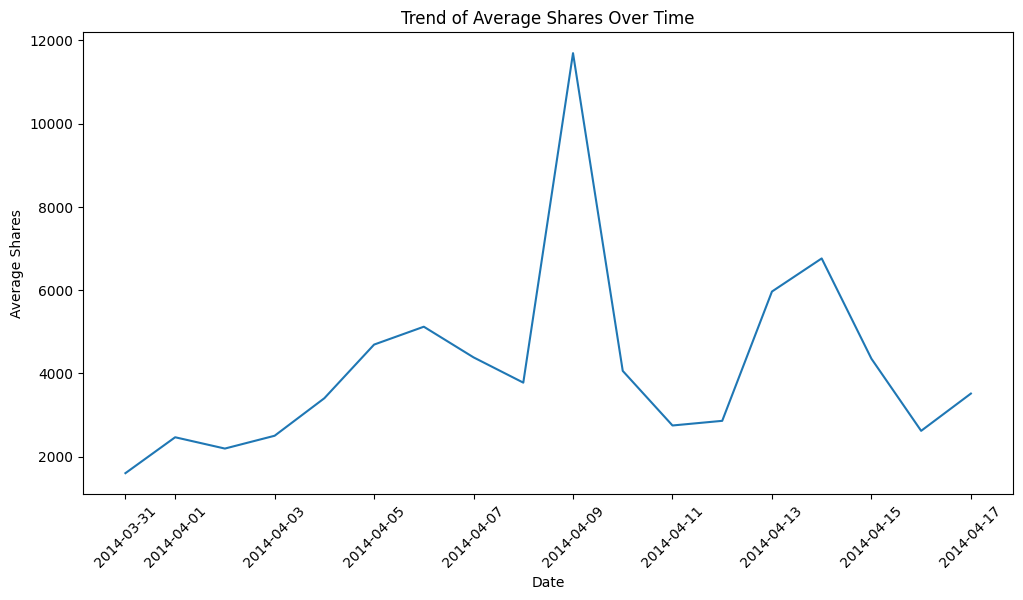

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

df['published_date'] = pd.to_datetime(df['published_date'])

# Group by published_date and calculate mean of shares
trend_data = df.groupby(df['published_date'].dt.date).mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(trend_data['shares'])
plt.title('Trend of Average Shares Over Time')
plt.xlabel('Date')
plt.ylabel('Average Shares')
plt.xticks(rotation=45)
plt.show()


In [ ]:

# Scatter plot of global subjectivity vs shares
plt.figure(figsize=(10, 6))
plt.scatter(df['global_subjectivity'], df['shares'])
plt.title('Global Subjectivity vs Shares')
plt.xlabel('Global Subjectivity')
plt.ylabel('Shares')
plt.show()

# Scatter plot of global sentiment polarity vs shares
plt.figure(figsize=(10, 6))
plt.scatter(df['global_sentiment_polarity'], df['shares'])
plt.title('Global Sentiment Polarity vs Shares')
plt.xlabel('Global Sentiment Polarity')
plt.ylabel('Shares')
plt.show()

In [ ]:
# Correlation matrix for selected features
selected_features = ['num_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
                     'global_subjectivity', 'global_sentiment_polarity', 'shares']
correlation_matrix = df[selected_features].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Selected Features')
plt.show()

In [ ]:

missing_values = df.isnull().sum()
missing_values